In [76]:
#Hyperparameters

BATCH_SIZE=32
lr=0.0005
NUM_EPOCHS=1
DEVICE='cuda'


In [77]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch. nn as nn 
import torch.nn.functional as F

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the images
])

# Download and load the training dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Download and load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Example of iterating through the data loader
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break  # Just to show the first batch


Batch of images shape: torch.Size([32, 1, 28, 28])
Batch of labels shape: torch.Size([32])


In [79]:
from AE import*
model=AutoEncoder()
model.to(DEVICE)
criterion = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=lr)

In [80]:
train_loss_list=[]
test_loss_list=[]
for epoch in range(NUM_EPOCHS):
 model.train()
 train_loss=0
 print("EPoch ",epoch)
 for images,_ in train_loader:
     images=images.to(DEVICE)
     out=model(images)
     loss=criterion(images,out)
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()
     train_loss+=loss.item()
 train_loss=train_loss/len(train_loader)
 train_loss_list.append(train_loss)
 print(f"Train loss is {train_loss}")
 test_loss=0
 model.eval()
 for images,_ in test_loader:
     images=images.to(DEVICE)
     with torch.no_grad():
      out=model(images)
      loss=criterion(images,out)
      test_loss+=loss.item()
 test_loss=test_loss/len(test_loader)
 test_loss_list.append(test_loss)
 print(f"Test loss is {test_loss}")



EPoch  0
Train loss is 0.7176543091138204
Test loss is 0.6913640396282695


In [81]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_loss(data, title):
# Plotting the data
 plt.plot(data)

 # Adding a title and labels
 plt.title(title)
 plt.xlabel('Index')
 plt.ylabel('Value')

 # Display the plot
 plt.show()

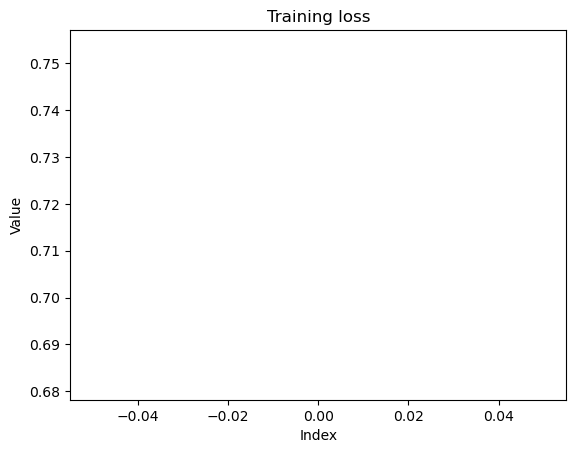

In [82]:
plot_loss(train_loss_list, "Training loss")

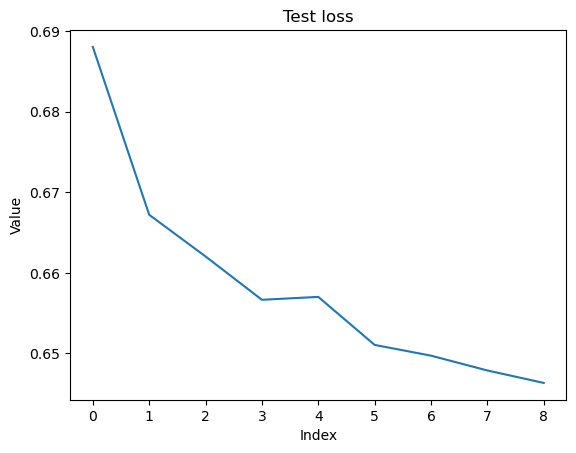

In [65]:
plot_loss(test_loss_list, "Test loss")

In [83]:
def plot_images(tensor):
    # Check if tensor has the correct shape
    if tensor.ndimension() != 4 or tensor.size(1) != 1 or tensor.size(2) != 28 or tensor.size(3) != 28:
        raise ValueError("Tensor must have shape (BATCH_SIZE, 1, 28, 28)")
    
    # Determine the batch size
    batch_size = tensor.size(0)
    
    # Determine the number of rows and columns for the plot grid
    rows = int(batch_size**0.5)
    cols = batch_size // rows
    
    # Plot the images
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    axes = axes.flatten()

    for i in range(batch_size):
        image = tensor[i].squeeze(0)  # Remove the channel dimension (1, 28, 28) -> (28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

IndexError: index 30 is out of bounds for axis 0 with size 30

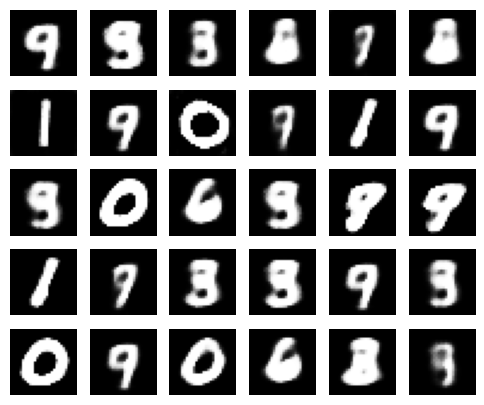

In [84]:
for images,_ in train_loader:
    images=images.to(DEVICE)
    out=model(images)
    plot_images(out.cpu().detach())
    print(out.shape)
    break
    